In [5]:
from skimage import io
from skimage.transform import rescale
from skimage.exposure import histogram
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
import numpy as np
import cv2

0.11271819855123695


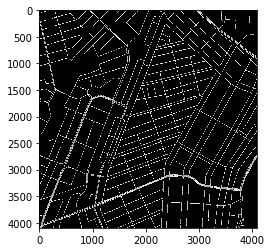

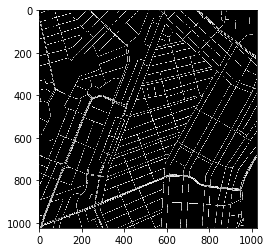

In [12]:
# image = io.imread("../sample_map.png")
# mask = io.imread("../sample_mask.png")
image = cv2.imread("../sample_map.png")
mask = cv2.imread("../sample_mask.png", 0)

original_image = image[:, :, 0] * mask

# image = rescale(image, 0.25)
# mask = rescale(mask, 0.25)
image = cv2.resize(image, (0, 0), fx = 0.25, fy = 0.25)
mask = cv2.resize(mask, (0, 0), fx = 0.25, fy = 0.25)

final_image = image[:, :, 0] * mask

# a = histogram(original_image, normalize = True)
# b = histogram(final_image, normalise = True)
a = cv2.calcHist([original_image],[0],None,[256],[0,256])
b = cv2.calcHist([final_image],[0],None,[256],[0,256])

print(cv2.compareHist(a, b, cv2.HISTCMP_BHATTACHARYYA))

plt.imshow(original_image, cmap = "gray"); plt.show()
plt.imshow(final_image, cmap = "gray"); plt.show()

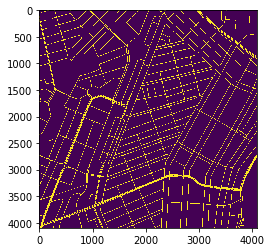

In [2]:
mask_sample = io.imread('./masks/amsterdam_-1_-1_osm.png')
plt.imshow(mask_sample); plt.show()

In [3]:
skeletonize?

[  0 255]


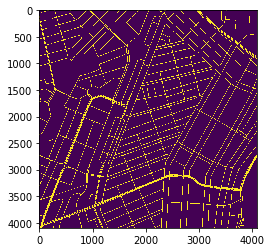

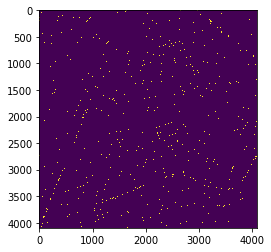

In [4]:
mask_sample = io.imread('./masks/amsterdam_-1_-1_osm.png')
print(np.unique(mask_sample))
mask_sample[mask_sample>0] = 1
plt.imshow(mask_sample); plt.show()
skeleton = skeletonize(mask_sample)

plt.imshow(skeleton); plt.show()

In [7]:
from skimage.morphology import thin
from skimage.morphology import erosion

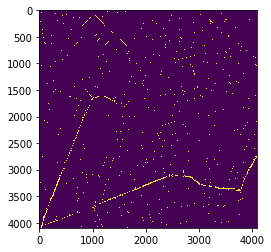

In [6]:
mask = io.imread('./masks/amsterdam_-1_-1_osm.png')
thinned = thin(mask, max_iter=5)
plt.imshow(thinned); plt.show()

In [9]:
kernel = np.ones((5,5))
thinned = erosion?


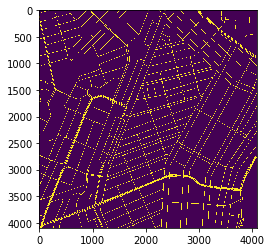

In [10]:
thinned = erosion(mask)
plt.imshow(thinned); plt.show()

In [11]:
from skimage.feature import canny

In [13]:
canny?

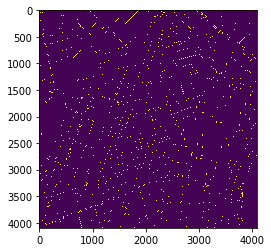

In [17]:
plt.imshow(canny(mask, low_threshold=0.1)); plt.show()

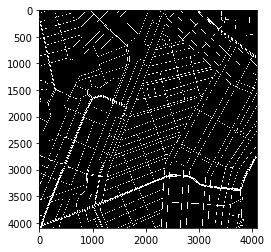

In [19]:
import cv2
kernel = np.ones((3,3))
erosion = cv2.erode(mask,kernel,iterations = 1)
plt.imshow(erosion, cmap=plt.cm.gray); plt.show()

In [ ]:
Getting Key points

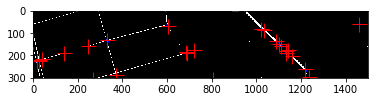

In [31]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks
erosion = cv2.erode(mask,kernel,iterations = 3)
coords = corner_peaks(corner_harris(erosion), min_distance=5)
coords_subpix = corner_subpix(erosion, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(erosion, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 1500,300, 0))
plt.show()